Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

Loading the Dataset

In [6]:
df = pd.read_csv('/content/PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


from matplotlib import pyplot as plt
_df_0['PJME_MW'].plot(kind='hist', bins=20, title='PJME_MW')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Datetime').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Datetime']
  ys = series['PJME_MW']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Datetime')):
  _plot_series(series, series_name, i)
  fig.legend(title='Datetime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('PJME_MW')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Datetime'}, axis=1)
              .sort_values('Datetime', ascending=True))
  xs = counted['Datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Datetime')):
  _plot_series(series, series_name, i)
  fig.legend(title='Datetime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['PJME_MW'].plot(kind='line', figsize=(8, 4), title='PJME_MW')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['Datetime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='PJME_MW', y='Datetime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
df.tail()

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [8]:
df.set_index('Datetime', inplace=True)
df.index = pd.to_datetime(df.index)

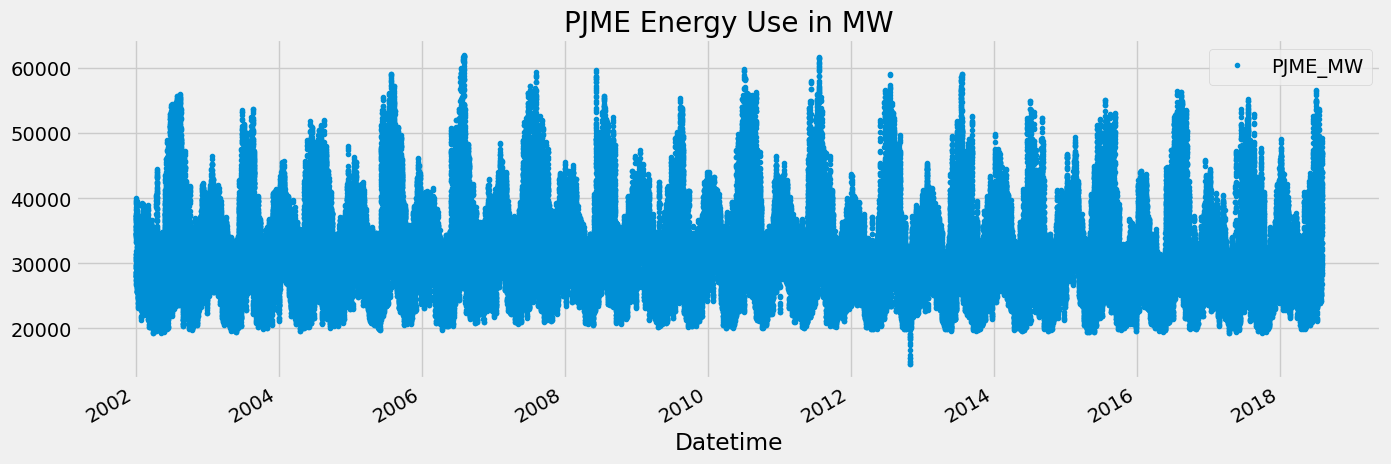

In [9]:
df.plot(style='.', figsize=(15, 5), color=color_pal[0], title='PJME Energy Use in MW')
plt.show()

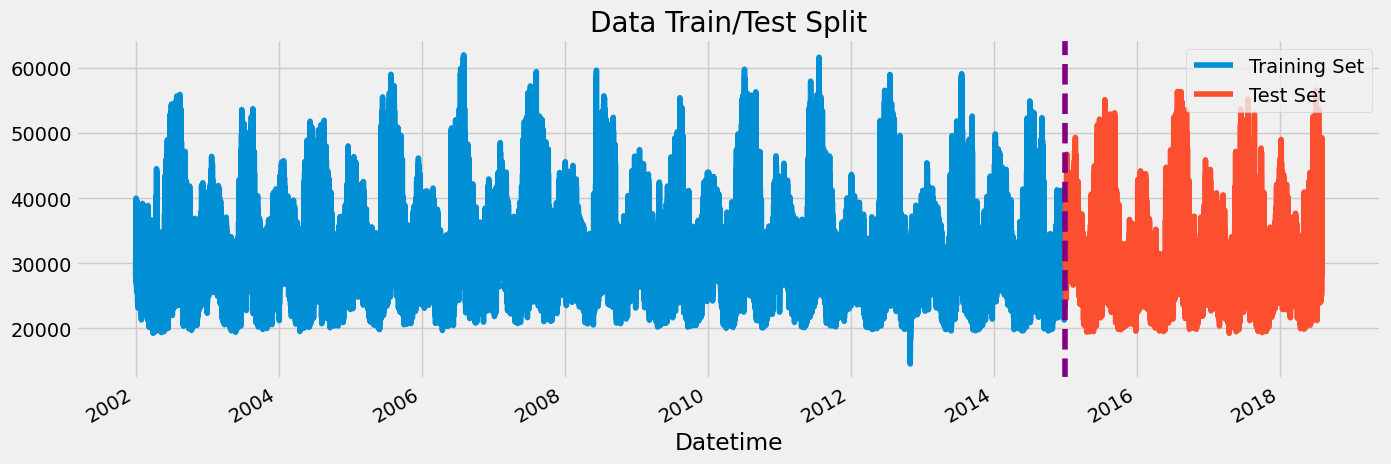

In [10]:
df_train = df.loc[df.index < '2015-01-01']
df_test = df.loc[df.index >= '2015-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test.plot(ax=ax, label='Test Set')
ax.axvline('2015-01-01', color='purple', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

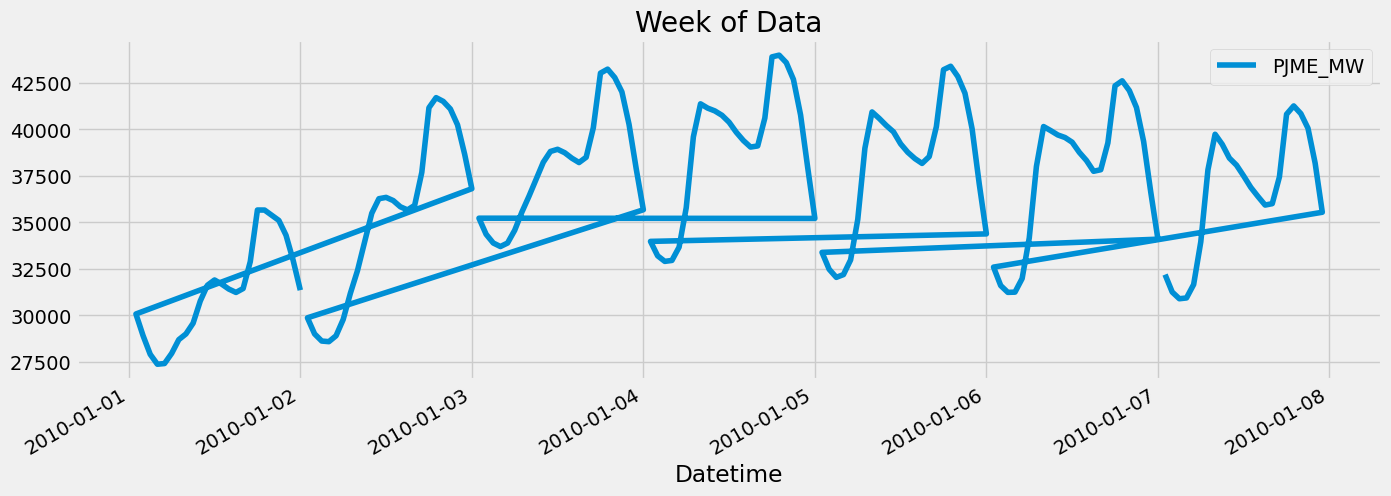

In [11]:
df.loc[(df.index > '2010-01-01') & (df.index < '2010-01-08')].plot(figsize=(15, 5), title='Week of Data')
plt.show()

In [12]:

def create_features(df):
    """
    Create time series features based on time series index
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [13]:
df = create_features(df)

Visualize Feature and Target Relationship

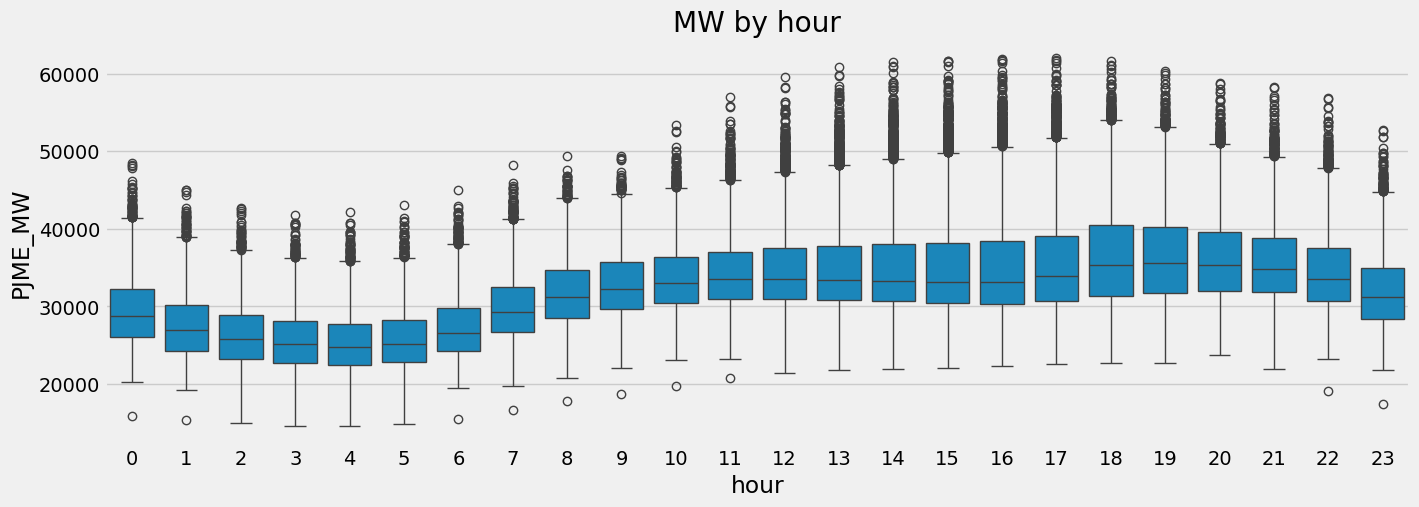

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by hour')
plt.show()

<ipython-input-15-664343c7c0f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PJME_MW', palette='twilight')


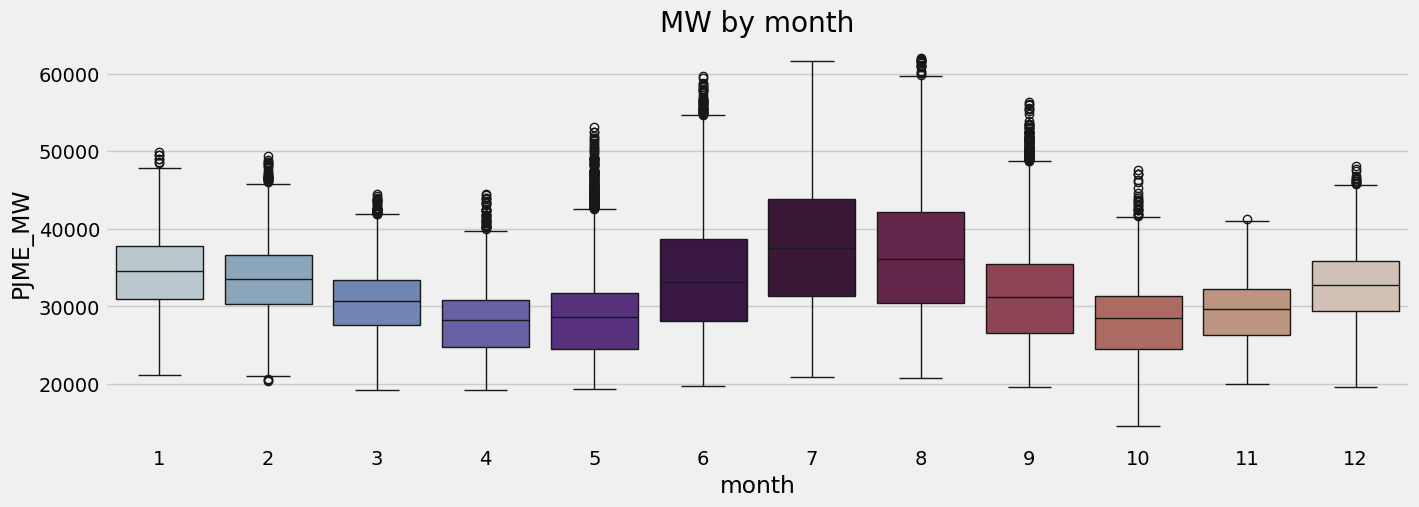

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='twilight')
ax.set_title('MW by month')
plt.show()

In [16]:
df_train = create_features(df_train)
df_test = create_features(df_test)

FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'PJME_MW'

X_train = df_train[FEATURES]
y_train = df_train[TARGET]

X_test = df_test[FEATURES]
y_test = df_test[TARGET]

In [17]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                      learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train,  y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.81619
[100]	validation_0-rmse:3911.97994	validation_1-rmse:4312.03224
[200]	validation_0-rmse:3244.38509	validation_1-rmse:3864.56545
[300]	validation_0-rmse:2996.08999	validation_1-rmse:3748.76687
[400]	validation_0-rmse:2830.28024	validation_1-rmse:3744.93340
[417]	validation_0-rmse:2801.66222	validation_1-rmse:3749.26089


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

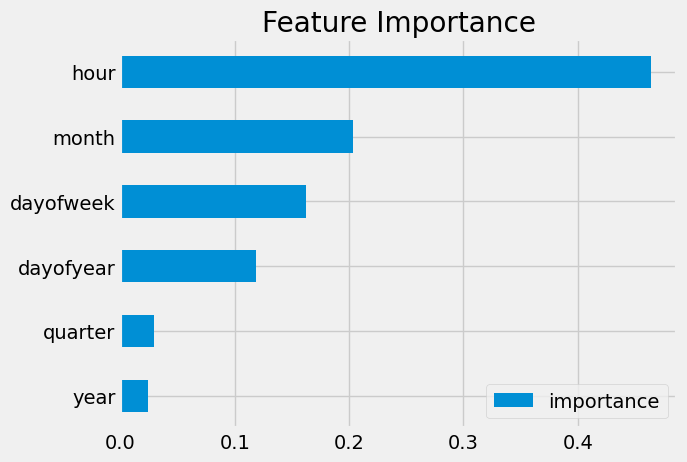

In [19]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [20]:
df_test['prediction'] = reg.predict(X_test)

In [21]:
df = df.merge(df_test['prediction'], how='left', left_index=True, right_index=True)

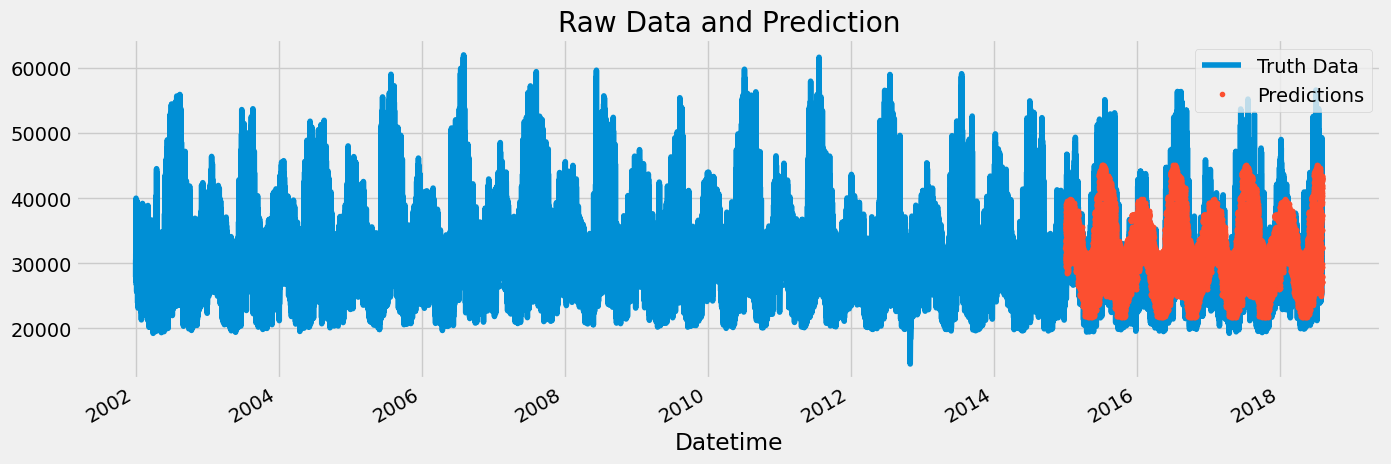

In [22]:
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

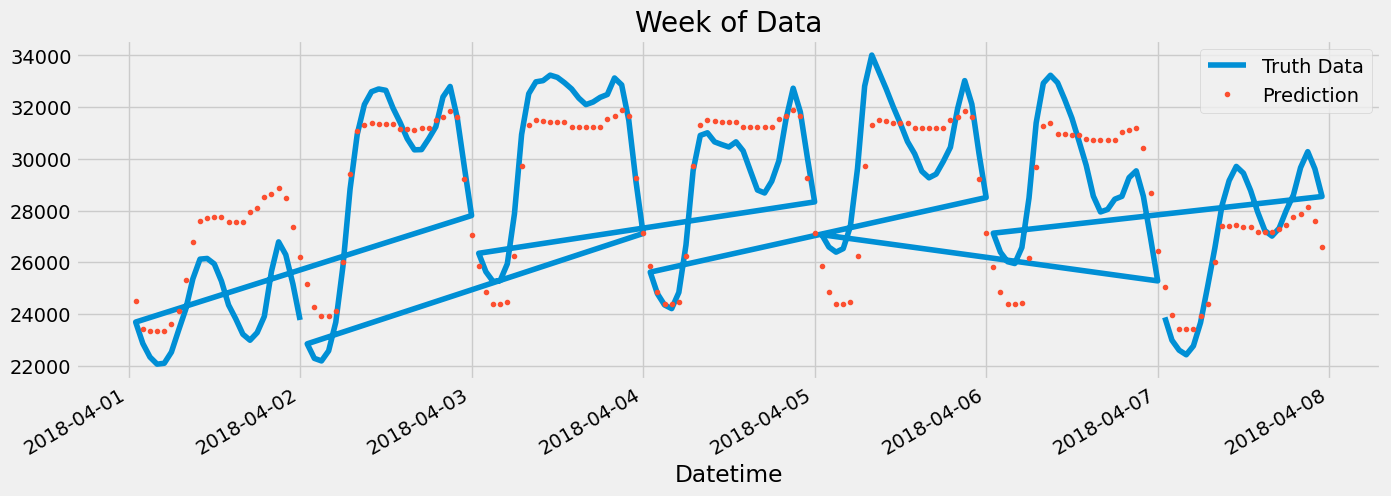

In [23]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'].plot(figsize=(15, 5), title='Week of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'].plot(style='.')
plt.legend(['Truth Data', 'Prediction'])
plt.show()

In [24]:
score = np.sqrt(mean_squared_error(df_test['PJME_MW'], df_test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3741.03


In [25]:
df_test['error'] = np.abs(df_test[TARGET] - df_test['prediction'])

In [26]:
df_test['date'] = df_test.index.date
df_test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

,error
date,
2016-08-13,13829.866211
2016-08-14,13577.304362
2016-09-10,11235.855143
2016-09-09,11032.220215
2016-08-12,10667.820312
2018-01-06,10407.698161
2015-02-20,10143.611491
2017-05-19,9495.122640
2016-07-04,9440.610596


In [27]:
df_test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

,error
date,
2016-12-30,395.436442
2017-10-24,413.885824
2016-10-27,440.053141
2016-04-04,440.223877
2017-05-02,453.738688
2015-10-28,459.086426
2016-06-03,467.453532
2018-02-06,477.327718
2016-08-08,496.441406
